In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

df = pd.read_csv("raw_data.csv")
df = df.drop(columns=['index'])

In [3]:
df = df.query("month != 'Annual'")

In [ ]:
df['crop'].unique()


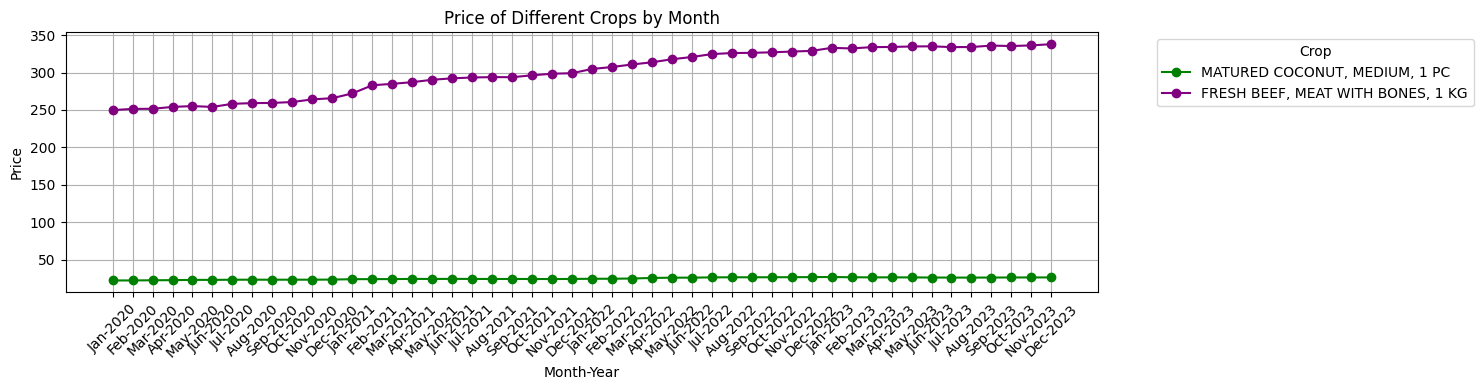

In [15]:
plt.figure(figsize=(15, 4))


# Get unique crops
# unique_crops = df['crop'].unique()
unique_crops = ["MATURED COCONUT, MEDIUM, 1 PC", "FRESH BEEF, MEAT WITH BONES, 1 KG"]
# Plot each crop separately
for crop in unique_crops:
    crop_df = df[df['crop'] == crop]
    if crop == 'MATURED COCONUT, MEDIUM, 1 PC':
        plt.plot(crop_df['month'] + '-' + crop_df['year'].astype(str), crop_df['price'], marker='o', label=crop, color='green')
    else:
        plt.plot(crop_df['month'] + '-' + crop_df['year'].astype(str), crop_df['price'], marker='o', label=crop, color='purple')

plt.xlabel('Month-Year')
plt.ylabel('Price')
plt.title('Price of Different Crops by Month')
plt.xticks(rotation=45)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Displaying the plot
plt.show()

In [47]:
#Calculate price swings relative to mean (Coefficient of Variation = SD/Mean)
crop_stats = df.groupby('crop')['price'].agg(['mean', 'std']).reset_index()
crop_stats.columns = ['crop', 'mean', 'std']

# Calculate coefficient of variation (CV)
crop_stats['cv'] = crop_stats['std'] / crop_stats['mean']

# Find crop with lowest and highest coefficient of variation (lowest price swings relative to its mean)
lowest_cv_crop = crop_stats.loc[crop_stats['cv'].idxmin()]
highest_cv_crop = crop_stats.loc[crop_stats['cv'].idxmax()]

print("Crop with lowest price swings relative to its mean (lowest coefficient of variation):")
print(lowest_cv_crop)
print("Crop with highest price swings relative to its mean (highest coefficient of variation):")
print(highest_cv_crop)

Crop with lowest price swings relative to its mean (lowest coefficient of variation):
crop    FRESH SHRIMP, SUAJE, MEDIUM, 1 KG
mean                           409.443333
std                             10.956174
cv                               0.026759
Name: 140, dtype: object
Crop with highest price swings relative to its mean (highest coefficient of variation):
crop    ONION WHITE (YELLOW GRANEX), 1 KG
mean                           147.127708
std                              60.66623
cv                               0.412337
Name: 168, dtype: object
